In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
from pathlib import Path
SRC_DIR = Path("/Users/jihoonchoi/Downloads/cse847_project/src").resolve()
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

from optimizers_logreg import fit_gd_fixed, fit_gd_armijo, armijo_backtracking
from models_logreg import sigmoid, logreg_loss_and_grad, fit_logreg, accuracy, predict_label, predict_prob, add_intercept

# Logistic Regression with L2-Penalty

### Import Dataset

In [17]:
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

# 1. Load the preprocessed data
train_df = pd.read_csv("train_scaled.csv")
test_df  = pd.read_csv("test_scaled.csv")

# 2. Split into features (X) and target (y)
# Target column is 'def_pay'
X_train = train_df.drop(columns=["def_pay"])
y_train = train_df["def_pay"]

X_test = test_df.drop(columns=["def_pay"])
y_test = test_df["def_pay"]

# --- optional check ---
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Sample features:\n", X_train.head())

/Users/jihoonchoi/Downloads/cse847_project/src
Train set: (24000, 26) (24000,)
Test set: (6000, 26) (6000,)
Sample features:
    limit_bal  sex_female       age     pay_1     pay_2     pay_3     pay_4  \
0  -0.676120           1 -1.134519 -0.469497 -0.400043 -0.388863 -0.344641   
1   0.940071           1  1.467205 -0.469497 -0.400043 -0.388863 -0.344641   
2   0.093495           0  0.057938 -0.469497 -0.400043 -0.388863 -0.344641   
3  -0.522197           0 -1.026114 -0.469497 -0.400043 -0.388863 -0.344641   
4  -0.907004           1 -1.459734 -0.469497 -0.400043 -0.388863 -0.344641   

      pay_5     pay_6  bill_amt1  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  \
0 -0.312747 -0.319495  -0.081523  ... -0.167625 -0.181802 -0.216587 -0.096648   
1 -0.312747 -0.319495   0.019790  ... -0.175159 -0.183055 -0.184433 -0.186609   
2 -0.312747 -0.319495  -0.634328  ... -0.206593 -0.179296  1.122578 -0.322844   
3 -0.312747 -0.319495   0.546130  ... -0.072370 -0.048563 -0.052200 -0.003012   


### Training Convergence Summary

In [18]:
w_gd, info_gd = fit_logreg(X_train, y_train, lam=1.0, optimizer="gd", step=1e-2)

print("Fixed GD:  iters =", info_gd["iters"],
      "  final loss =", info_gd["history"][-1][1],
      "  grad norm =", info_gd["history"][-1][2])

w_arm, info_arm = fit_logreg(X_train, y_train, lam=1.0, optimizer="gd_armijo", alpha0=1.0)

print("Armijo GD: iters =", info_arm["iters"],
      "  final loss =", info_arm["history"][-1][1],
      "  grad norm =", info_arm["history"][-1][2])

Fixed GD:  iters = 975   final loss = 0.6099178297143104   grad norm = 9.92656992218895e-07
Armijo GD: iters = 13   final loss = 0.6099178297140719   grad norm = 9.508887736401374e-07


### Convergence Curves

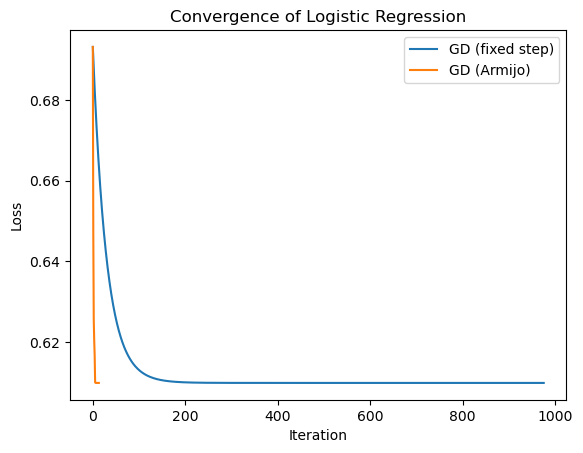

In [19]:
gd_hist = np.array(info_gd["history"])
arm_hist = np.array(info_arm["history"])

plt.plot(gd_hist[:,0], gd_hist[:,1], label="GD (fixed step)")
plt.plot(arm_hist[:,0], arm_hist[:,1], label="GD (Armijo)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence of Logistic Regression")
plt.show()

### Final Weights & Accuracy

In [20]:
acc_gd = accuracy(w_gd, add_intercept(X_test), y_test)
acc_arm = accuracy(w_arm, add_intercept(X_test), y_test)

print(f"Fixed-step GD accuracy: {acc_gd:.3f}")
print(f"Armijo GD accuracy: {acc_arm:.3f}")

NameError: name 'add_intercept' is not defined